<a href="https://colab.research.google.com/github/AtomZa/BadApple-EdgeDetection/blob/main/ImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [18]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Define the transformation to apply to each image
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# Define the paths to the folders for each class label
train_folder = '/content/sample_data/train'
test_folder = '/content/sample_data/test'

# Create the training dataset
train_dataset = ImageFolder(train_folder, transform=transform)
train_dataset.class_to_idx = {'class_1': 0, 'class_2': 1}

# Create the test dataset
test_dataset = ImageFolder(test_folder, transform=transform)
test_dataset.class_to_idx = {'class_1': 0, 'class_2': 1}

# Define the data loaders for training and test data
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the CNN classifier
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc = nn.Linear(32 * 8 * 8, 2)  # 8x8 is the output size after pooling

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Instantiate the model
model = CNNClassifier()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print loss at the end of each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluation on test data
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions and true labels for later evaluation
        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Calculate evaluation metrics
confusion = confusion_matrix(true_labels, predictions)
f1_class1 = f1_score(true_labels, predictions, pos_label=0)  # F1 score for class 1
f1_class2 = f1_score(true_labels, predictions, pos_label=1)  # F1 score for class 2
f1_macro = (f1_class1 + f1_class2) / 2  # Macro-average F1 score
accuracy = (confusion[0, 0] + confusion[1, 1]) / np.sum(confusion)  # Accuracy

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Display F1 score for each class and overall accuracy
print("F1 Score (Class 1):", f1_class1)
print("F1 Score (Class 2):", f1_class2)
print("Macro-average F1 Score:", f1_macro)
print("Accuracy:", accuracy)

Epoch 1/100, Loss: 0.6856
Epoch 2/100, Loss: 0.4631
Epoch 3/100, Loss: 0.1683
Epoch 4/100, Loss: 0.1466
Epoch 5/100, Loss: 0.0971
Epoch 6/100, Loss: 0.0501
Epoch 7/100, Loss: 0.0283
Epoch 8/100, Loss: 0.0209
Epoch 9/100, Loss: 0.0187
Epoch 10/100, Loss: 0.0174
Epoch 11/100, Loss: 0.0156
Epoch 12/100, Loss: 0.0131
Epoch 13/100, Loss: 0.0104
Epoch 14/100, Loss: 0.0079
Epoch 15/100, Loss: 0.0059
Epoch 16/100, Loss: 0.0044
Epoch 17/100, Loss: 0.0033
Epoch 18/100, Loss: 0.0026
Epoch 19/100, Loss: 0.0021
Epoch 20/100, Loss: 0.0017
Epoch 21/100, Loss: 0.0014
Epoch 22/100, Loss: 0.0012
Epoch 23/100, Loss: 0.0011
Epoch 24/100, Loss: 0.0010
Epoch 25/100, Loss: 0.0009
Epoch 26/100, Loss: 0.0009
Epoch 27/100, Loss: 0.0008
Epoch 28/100, Loss: 0.0008
Epoch 29/100, Loss: 0.0008
Epoch 30/100, Loss: 0.0007
Epoch 31/100, Loss: 0.0007
Epoch 32/100, Loss: 0.0007
Epoch 33/100, Loss: 0.0007
Epoch 34/100, Loss: 0.0006
Epoch 35/100, Loss: 0.0006
Epoch 36/100, Loss: 0.0006
Epoch 37/100, Loss: 0.0006
Epoch 38/1

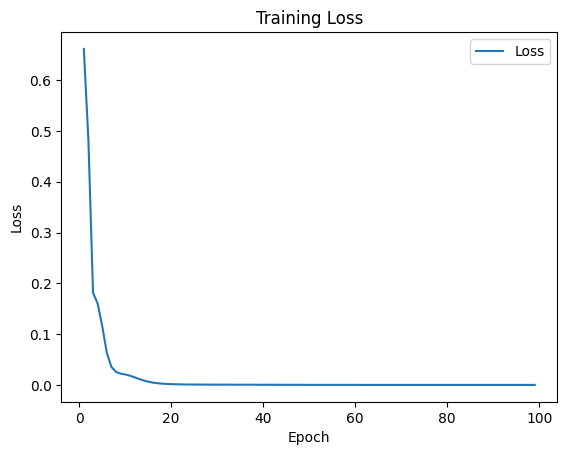

In [12]:
import matplotlib.pyplot as plt

# Define the loss values
loss_values = [0.6612, 0.4811, 0.1816, 0.1603, 0.1161, 0.0632, 0.0356, 0.0257, 0.0226, 0.0209, 0.0185,
               0.0154, 0.0120, 0.0090, 0.0067, 0.0049, 0.0037, 0.0028, 0.0022, 0.0018, 0.0016, 0.0014,
               0.0012, 0.0011, 0.0011, 0.0010, 0.0010, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008,
               0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0005,
               0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004,
               0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
               0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
               0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
               0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003]

# Plot the loss values
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

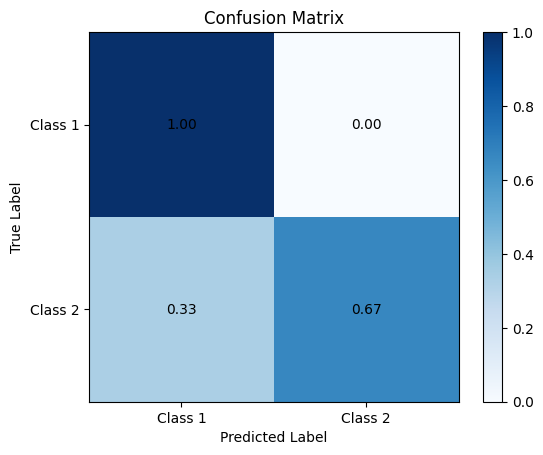

In [13]:
import numpy as np
import matplotlib.pyplot as plt

confusion_matrix = np.array([[3, 0], [1, 2]])

# Normalize the confusion matrix
normalized_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heat map
plt.imshow(normalized_matrix, cmap='Blues')

# Add labels and tick marks
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(2), ['Class 1', 'Class 2'])
plt.yticks(np.arange(2), ['Class 1', 'Class 2'])

# Add the values in each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(normalized_matrix[i, j], '.2f'), ha='center', va='center')

plt.colorbar()
plt.show()


# Segmentation

In [49]:
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# from torchvision.datasets import ImageFolder
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt

# # Define the transformation to apply to each image and mask
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),  # Adjust the image size according to your requirements
#     transforms.ToTensor()
# ])

# # Define the paths to the folders for images and masks
# train_image_folder = '/content/sample_data/utrain/images'
# train_mask_folder = '/content/sample_data/utrain/masks'
# test_image_folder = '/content/sample_data/utest/images'
# test_mask_folder = '/content/sample_data/utest/masks'

# # Create the training dataset
# train_dataset = ImageFolder(train_image_folder, transform=transform)
# train_mask_dataset = ImageFolder(train_mask_folder, transform=transform)

# # Create the test dataset
# test_dataset = ImageFolder(test_image_folder, transform=transform)
# test_mask_dataset = ImageFolder(test_mask_folder, transform=transform)

# # Define the data loaders for training and test data
# train_loader = DataLoader(list(zip(train_dataset, train_mask_dataset)), batch_size=8, shuffle=True)
# test_loader = DataLoader(list(zip(test_dataset, test_mask_dataset)), batch_size=8, shuffle=False)

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image

# Define the transformation to apply to each image and mask
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust the image size according to your requirements
    transforms.ToTensor()
])

# Define the paths to the folders for images and masks
train_image_folder = '/content/sample_data/utrain/images'
train_mask_folder = '/content/sample_data/utrain/masks'
test_image_folder = '/content/sample_data/utest/images'
test_mask_folder = '/content/sample_data/utest/masks'

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform

        self.image_files = sorted(os.listdir(image_folder))
        self.mask_files = sorted(os.listdir(mask_folder))

    def __getitem__(self, index):
        image_path = os.path.join(self.image_folder, self.image_files[index])
        mask_path = os.path.join(self.mask_folder, self.mask_files[index])

        image = Image.open(image_path)
        mask = Image.open(mask_path)

        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

    def __len__(self):
        return len(self.image_files)

# Create the training dataset
train_dataset = CustomDataset(train_image_folder, train_mask_folder, transform=transform)

# Create the test dataset
test_dataset = CustomDataset(test_image_folder, test_mask_folder, transform=transform)

# Define the data loaders for training and test data
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the U-Net architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 1, kernel_size=1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
      # Encoder
      enc_outputs = []
      for module in self.encoder:
          x = module(x)
          if isinstance(module, nn.MaxPool2d):
              enc_outputs.append(x)

      # Decoder
      dec_outputs = []
      for module in self.decoder:
          if isinstance(module, nn.ConvTranspose2d):
              x = module(x)
              enc_output = enc_outputs.pop()
              expected_size = (x.size(2), x.size(3))
              enc_output = nn.functional.interpolate(enc_output, size=expected_size, mode='bilinear', align_corners=False)
              x = torch.cat([x, enc_output], dim=1)
          else:
              x = module(x)

      return x

# Instantiate the U-Net model
model = UNet()

# Define the loss function
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary segmentation

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
losses = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for (images, masks) in train_loader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    # Store the average loss for each epoch
    losses.append(epoch_loss / len(train_loader))

    # Print loss at the end of each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {losses[-1]:.4f}")

# Plot the loss curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluation on test data
model.eval()
with torch.no_grad():
    intersection = 0
    union = 0
    for (images, masks) in test_loader:
        outputs = model(images)
        predicted_masks = (outputs > 0.5).float()
        
        # Compute intersection and union for each image
        intersection += torch.sum(predicted_masks * masks)
        union += torch.sum(predicted_masks) + torch.sum(masks) - torch.sum(predicted_masks * masks)
    
    # Calculate the Intersection over Union (IoU) score
    iou = intersection / union

# Print the IoU score
print("Intersection over Union (IoU):", iou)


RuntimeError: ignored

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image

# Define the transformation to apply to each image and mask
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Adjust the image size according to your requirements
    transforms.ToTensor()
])

# Define the paths to the folders for images and masks
train_image_folder = '/content/sample_data/utrain/images'
train_mask_folder = '/content/sample_data/utrain/masks'
test_image_folder = '/content/sample_data/utest/images'
test_mask_folder = '/content/sample_data/utest/masks'

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, image_folder, mask_folder, transform=None):
        self.image_folder = image_folder
        self.mask_folder = mask_folder
        self.transform = transform

        self.image_files = sorted(os.listdir(image_folder))
        self.mask_files = sorted(os.listdir(mask_folder))

    def __getitem__(self, index):
        image_path = os.path.join(self.image_folder, self.image_files[index])
        mask_path = os.path.join(self.mask_folder, self.mask_files[index])

        image = Image.open(image_path)
        mask = Image.open(mask_path)

        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

    def __len__(self):
        return len(self.image_files)

# Create the training dataset
train_dataset = CustomDataset(train_image_folder, train_mask_folder, transform=transform)

# Create the test dataset
test_dataset = CustomDataset(test_image_folder, test_mask_folder, transform=transform)

# Define the data loaders for training and test data
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the U-Net architecture
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 1024, kernel_size=3, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 3, kernel_size=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

# Instantiate the U-Net model
model = UNet()

# Define the loss function and optimizer
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Apply weight decay for regularization

# Training loop
num_epochs = 100
train_loss = []
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for (images, masks) in train_loader:
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, masks)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Store the average loss for each epoch
    train_loss.append(epoch_loss / len(train_loader))

    # Print loss at the end of each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss[-1]:.4f}")

Epoch 1/100, Loss: 0.7321
Epoch 2/100, Loss: 0.7005
Epoch 3/100, Loss: 0.6516
Epoch 4/100, Loss: 0.6130
Epoch 5/100, Loss: 0.5675
Epoch 6/100, Loss: 0.5436
Epoch 7/100, Loss: 0.5226
Epoch 8/100, Loss: 0.5063
Epoch 9/100, Loss: 0.4918
Epoch 10/100, Loss: 0.4791
Epoch 11/100, Loss: 0.4670
Epoch 12/100, Loss: 0.4563
Epoch 13/100, Loss: 0.4468
Epoch 14/100, Loss: 0.4372
Epoch 15/100, Loss: 0.4282
Epoch 16/100, Loss: 0.4197
Epoch 17/100, Loss: 0.4116
Epoch 18/100, Loss: 0.4040
Epoch 19/100, Loss: 0.3968
Epoch 20/100, Loss: 0.3898
Epoch 21/100, Loss: 0.3832
Epoch 22/100, Loss: 0.3766
Epoch 23/100, Loss: 0.3703
Epoch 24/100, Loss: 0.3640
Epoch 25/100, Loss: 0.3578
Epoch 26/100, Loss: 0.3517
Epoch 27/100, Loss: 0.3457
Epoch 28/100, Loss: 0.3399
Epoch 29/100, Loss: 0.3341
Epoch 30/100, Loss: 0.3282
Epoch 31/100, Loss: 0.3224
Epoch 32/100, Loss: 0.3165
Epoch 33/100, Loss: 0.3104
Epoch 34/100, Loss: 0.3043
Epoch 35/100, Loss: 0.2984
Epoch 36/100, Loss: 0.2928
Epoch 37/100, Loss: 0.2876
Epoch 38/1

Percent Similarity: 5.70%


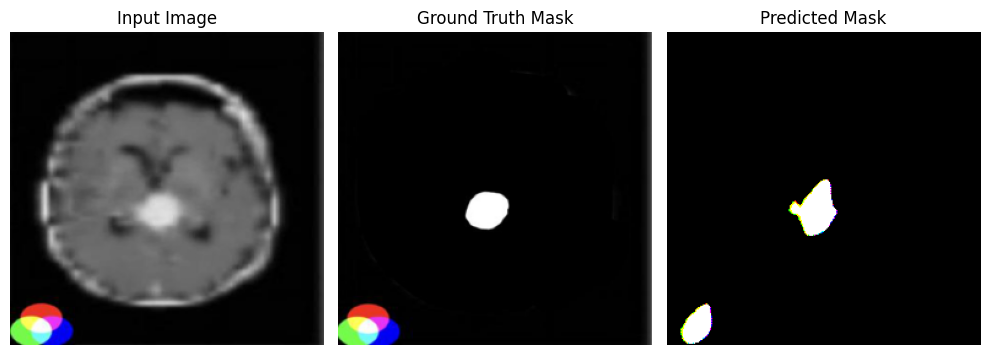

In [12]:
# Evaluation on test data
intersection = 0
union = 0

# Visualize input, mask, and predicted mask
with torch.no_grad():
    for (images, masks) in test_loader:
        outputs = model(images)
        predicted_masks = (outputs > 0.5).float()  # Apply threshold to convert probabilities to binary masks

        intersection += torch.logical_and(predicted_masks, masks).sum().item()
        union += torch.logical_or(predicted_masks, masks).sum().item()

    average_iou = intersection / union
    percent_similarity = average_iou * 100

    # Print the percent similarity
    print("Percent Similarity: {:.2f}%".format(percent_similarity))

    # Iterate over each image in the batch
    for i in range(images.shape[0]):
        # Display the input image, ground truth mask, and predicted mask
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 3, 1)
        plt.imshow(images[i].numpy().transpose(1, 2, 0))
        plt.title('Input Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(masks[i].squeeze().numpy().transpose(1, 2, 0), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(predicted_masks[i].squeeze().numpy().transpose(1, 2, 0), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.tight_layout()
        plt.show()


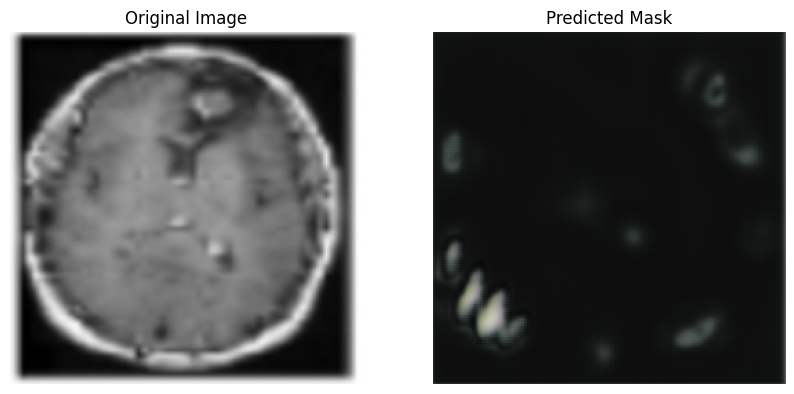

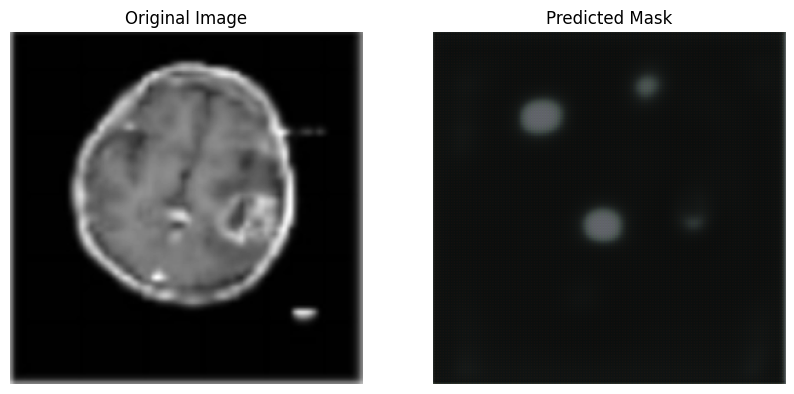

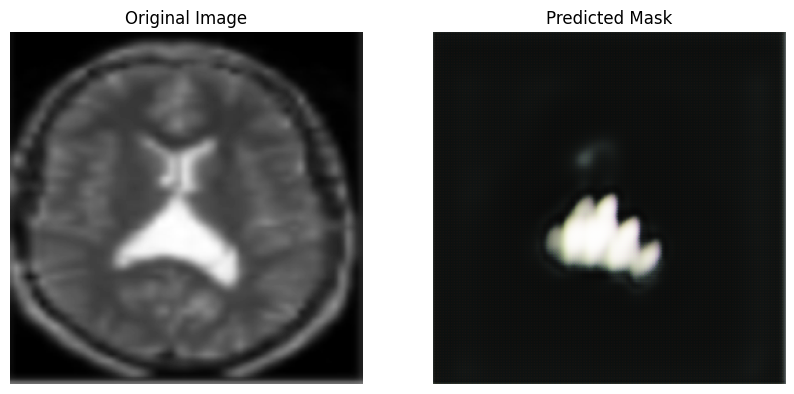

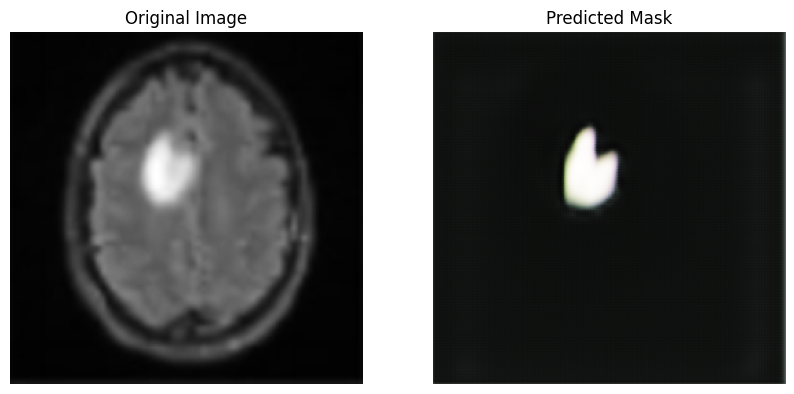

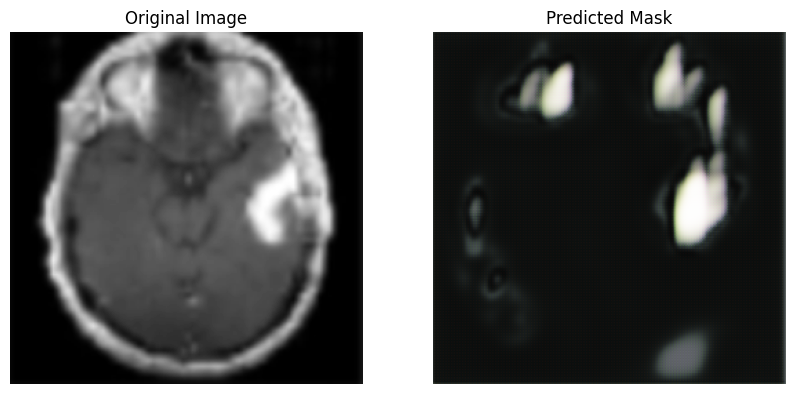

Skipping image: Color channels mismatch


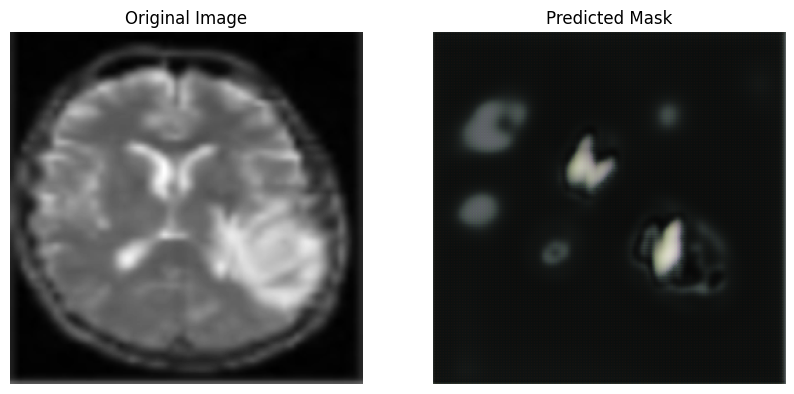

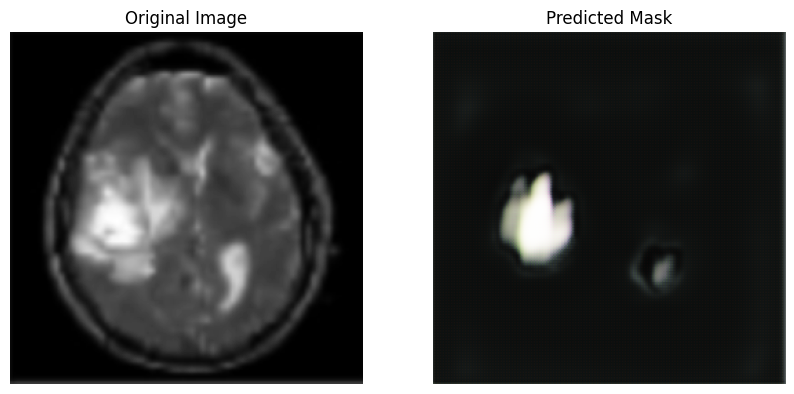

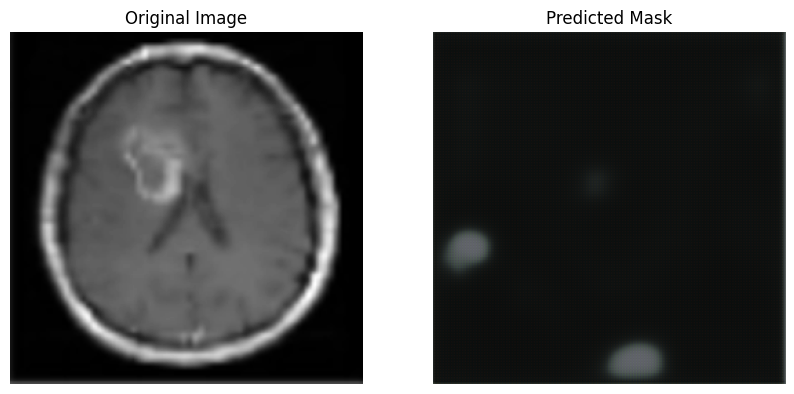

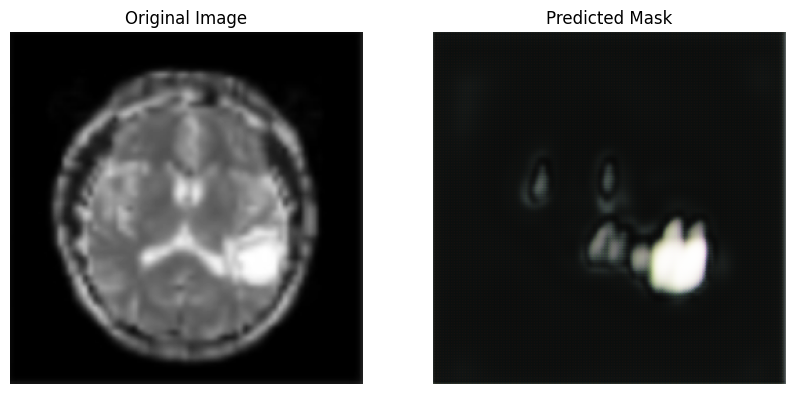

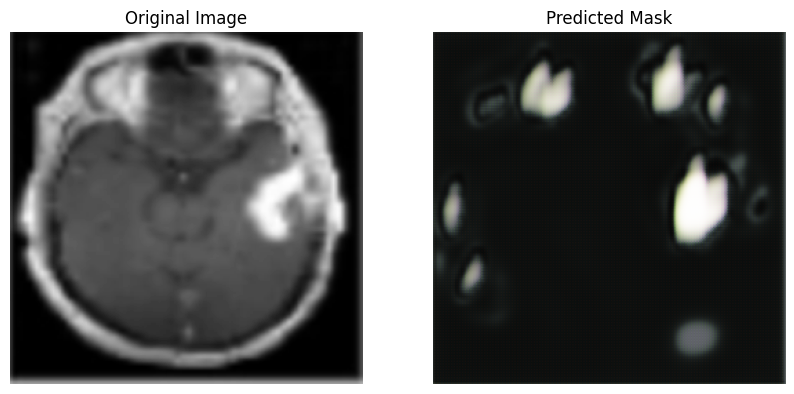

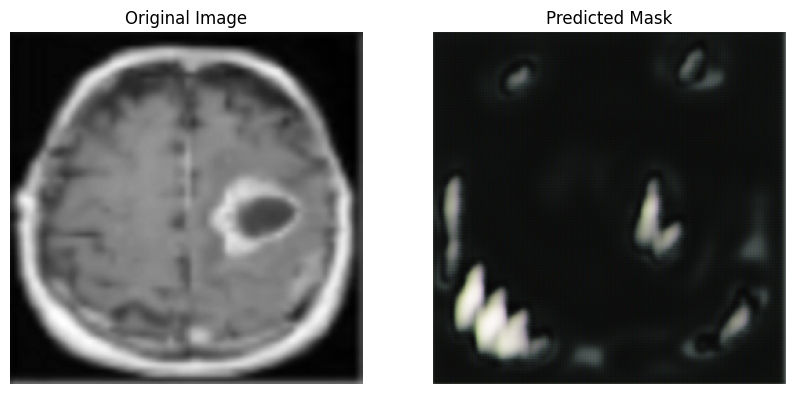

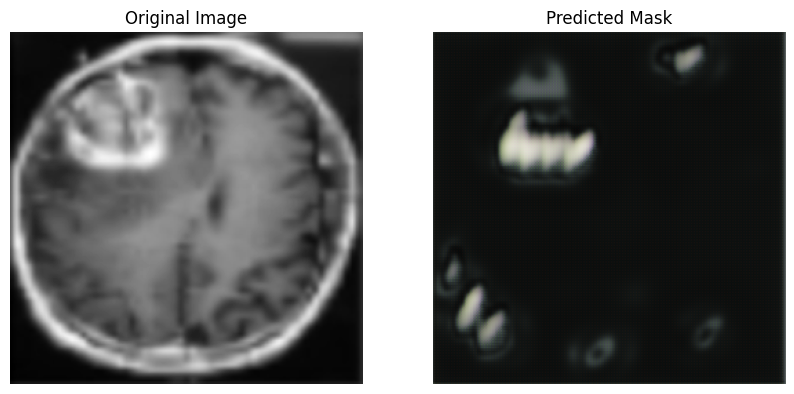

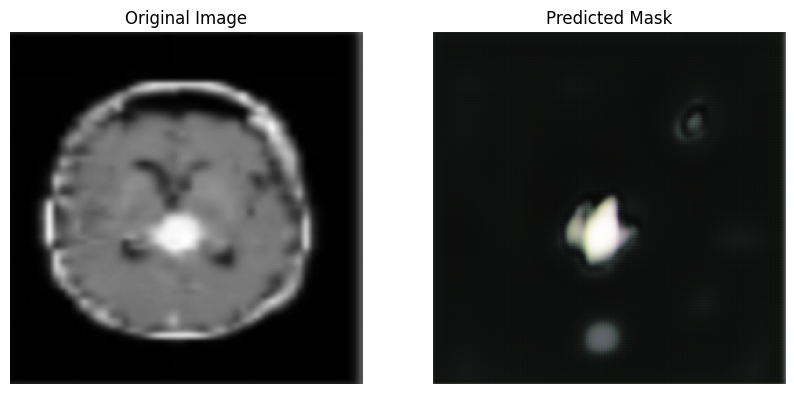

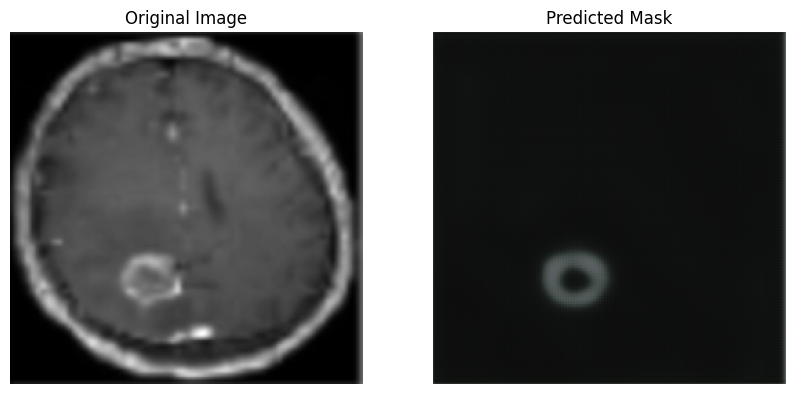

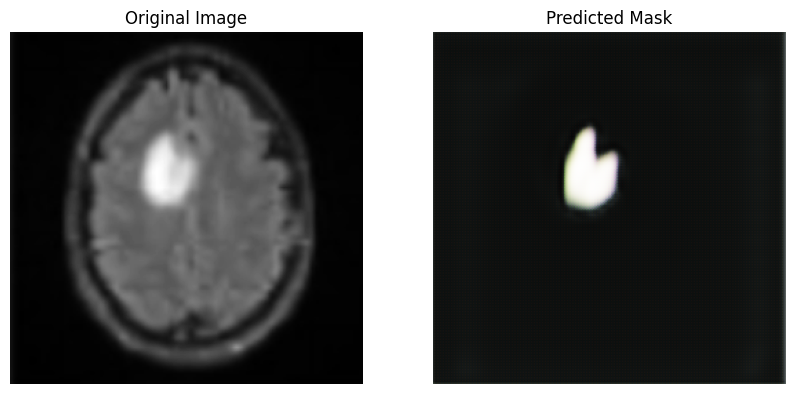

In [21]:
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.transform = transform

        self.image_files = sorted(os.listdir(image_folder))

    def __getitem__(self, index):
        image_path = os.path.join(self.image_folder, self.image_files[index])

        image = Image.open(image_path)

        if self.transform is not None:
            image = self.transform(image)

        return image

    def __len__(self):
        return len(self.image_files)

# Define the paths to the folder for images to be labeled
tolabel_image_folder = '/content/sample_data/tolabel/images' 

# Create the tolabel dataset
tolabel_dataset = CustomDataset(tolabel_image_folder, transform=transform)

# Define the data loader for the tolabel data
tolabel_loader = DataLoader(tolabel_dataset, batch_size=1, shuffle=False)

# Switch the model to evaluation mode
model.eval()

# Iterate over the tolabel dataset and process each image
for image in tolabel_loader:
    # Check the number of channels in the image
    if image.shape[1] != 1:
        print("Skipping image: Color channels mismatch")
        continue

    # Convert grayscale image to RGB by repeating the single channel
    image_rgb = image.repeat(1, 3, 1, 1)

    # Forward pass through the model
    with torch.no_grad():
        output = model(image_rgb)

    # Convert the output tensor to a numpy array and remove the batch dimension
    output = output.squeeze(0).numpy()

    # Plot the original image and predicted mask
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image.squeeze(), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(output.transpose(1, 2, 0))
    axes[1].set_title('Predicted Mask')
    axes[1].axis('off')

    plt.show()